<a href="https://colab.research.google.com/github/tushardhake0251/Machine_Learning_Projects/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd


In [2]:
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

In [5]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Loading The Dataset

In [10]:
df = pd.read_csv('/content/drive/MyDrive/train_40k.csv')
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    40000 non-null  object 
 1   Title        39984 non-null  object 
 2   userId       40000 non-null  object 
 3   Helpfulness  40000 non-null  object 
 4   Score        40000 non-null  float64
 5   Time         40000 non-null  int64  
 6   Text         40000 non-null  object 
 7   Cat1         40000 non-null  object 
 8   Cat2         40000 non-null  object 
 9   Cat3         40000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.1+ MB


# Text Preprocessing

In [12]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [13]:
def clean_review(review_text):
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    review_text = str(review_text).lower()
    review_text = word_tokenize(review_text)
    review_text = [item for item in review_text if item not in stop_words]
    review_text = [lemma.lemmatize(word=w, pos='v') for w in review_text]
    review_text = [i for i in review_text if len(i) > 2]
    review_text = ' '.join(review_text)
    review_text = ''.join((item for item in review_text if not item.isdigit()))
    return review_text 

In [14]:
df['clean_text'] = df['Text'].apply(clean_review)

In [15]:
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,clean_text
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky,description photo product need change indicate...
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown,great book well think easily imagine events ha...
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown,first year teacher teach grade special read cl...
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown,get book bookfair school look something summer...
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles,martine redman create puzzle briarpatch use gr...


# Labeling
*   Labeling has done by considering Score column, for better understanding.


In [16]:
def LableFunction(Score):
    if Score >=4:
        return 'Positive'
    elif Score <= 2:
        return 'Negative'
    else:
        return 'Neutral'


In [17]:
df['label'] = df['Score'].apply(LableFunction)

In [18]:
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,clean_text,label
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky,description photo product need change indicate...,Neutral
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown,great book well think easily imagine events ha...,Positive
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown,first year teacher teach grade special read cl...,Positive
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown,get book bookfair school look something summer...,Positive
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles,martine redman create puzzle briarpatch use gr...,Positive


# Label Encoder - 

*   To convert target [categorical] column to numerical column,  by using Label Encoder.



In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['Cat1'] =le.fit_transform(df['Cat1'])

In [21]:
df.head(10)

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,clean_text,label
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,2,meat poultry,jerky,description photo product need change indicate...,Neutral
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,5,games,unknown,great book well think easily imagine events ha...,Positive
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",5,games,unknown,first year teacher teach grade special read cl...,Positive
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,5,games,unknown,get book bookfair school look something summer...,Positive
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,5,puzzles,jigsaw puzzles,martine redman create puzzle briarpatch use gr...,Positive
5,B00000DMER,ThinkFun Rush Hour,unknown,2/2,5.0,912816000,"My eight year old loves this game, whenever he...",5,games,board games,eight year old love game whenever coax away fa...,Positive
6,B00004RYGX,Beetle Juice (1988),unknown,1/1,4.0,918000000,The real joy of this movie doesn't lie in its ...,2,beverages,juices,real joy movie lie fun special effect twist al...,Positive
7,B00004CI84,Beetle Juice [VHS] (1988),unknown,1/6,3.0,928108800,"Okay, Tim Burton is genuine. He haunts you wit...",2,beverages,juices,okay tim burton genuine haunt film wood edward...,Neutral
8,B0007URYFM,Boundaries,unknown,2/2,5.0,931046400,"Boundaries, along with counseling, has given m...",1,makeup,nails,boundaries along counsel give tool work toward...,Positive
9,B00000J0NT,Crayola 120ct Original Crayons,unknown,9/9,5.0,931219200,120 colors? I say 120 sticks of fun! And a fre...,5,arts crafts,drawing painting supplies,color say stick fun free sharpener shave holde...,Positive


In [22]:
df[["Text", "clean_text"]].head(10)

,Text,clean_text
0,The description and photo on this product need...,description photo product need change indicate...
1,This was a great book!!!! It is well thought t...,great book well think easily imagine events ha...
2,"I am a first year teacher, teaching 5th grade....",first year teacher teach grade special read cl...
3,I got the book at my bookfair at school lookin...,get book bookfair school look something summer...
4,Hi! I'm Martine Redman and I created this puzz...,martine redman create puzzle briarpatch use gr...
5,"My eight year old loves this game, whenever he...",eight year old love game whenever coax away fa...
6,The real joy of this movie doesn't lie in its ...,real joy movie lie fun special effect twist al...
7,"Okay, Tim Burton is genuine. He haunts you wit...",okay tim burton genuine haunt film wood edward...
8,"Boundaries, along with counseling, has given m...",boundaries along counsel give tool work toward...
9,120 colors? I say 120 sticks of fun! And a fre...,color say stick fun free sharpener shave holde...


In [23]:
df['Cat1'].value_counts()

5    10266
3     9772
1     5846
0     5637
4     4862
2     3617
Name: Cat1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


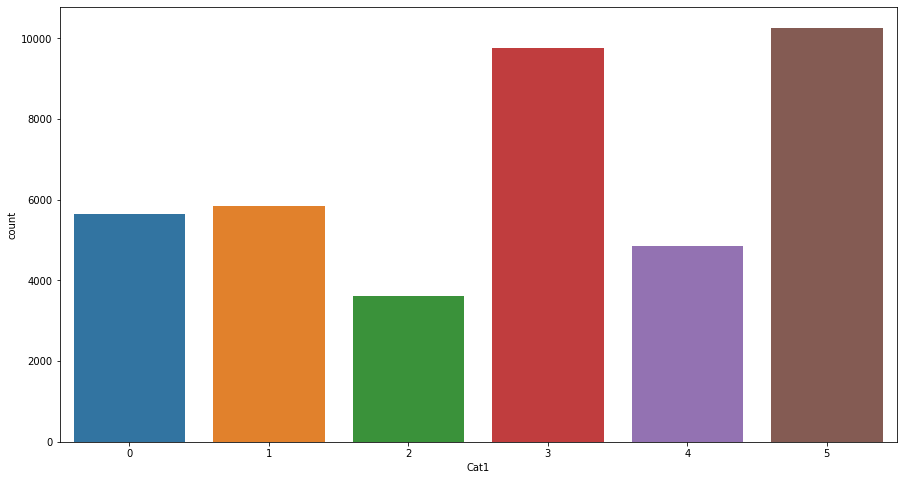

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(df['Cat1'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


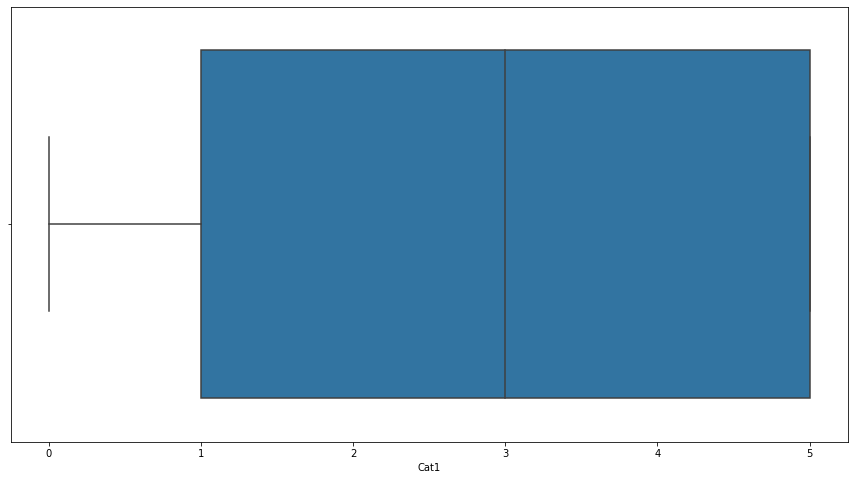

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Cat1'])

# TF-IDF on Logistic Regression.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorizer = TfidfVectorizer()
Vec = vectorizer.fit_transform(df['clean_text'])
print(vectorizer.get_feature_names())

['aaa', 'aaaa', 'aaaaaaaaaaaahhhhhhhhhh', 'aaaaaaaauuuuuuussssssoooooommmmmmmeeeeeee', 'aaaaaah', 'aaaaaand', 'aaaaaggghhhhh', 'aaaagggghhhhh', 'aaas', 'aack', 'aacute', 'aadams', 'aag', 'aagreat', 'aang', 'aare', 'aas', 'aasand', 'aayla', 'aback', 'abandon', 'abandonment', 'abate', 'abbies', 'abbreviate', 'abby', 'abc', 'abcs', 'abd', 'abdomen', 'abdominal', 'abdonminal', 'abe', 'abel', 'abenoe', 'abercrombie', 'aberration', 'aberrations', 'abhor', 'abialetti', 'abide', 'abigail', 'abilites', 'abilities', 'ability', 'abilties', 'abit', 'abject', 'able', 'ablilty', 'ably', 'abnormal', 'abnormalities', 'abnormally', 'aboard', 'abolutely', 'abominable', 'abomination', 'aboout', 'aborbent', 'abort', 'abortion', 'abortions', 'abosolutely', 'abosorb', 'abosultely', 'abosultley', 'abou', 'aboud', 'abound', 'abouti', 'aboutnot', 'abouve', 'abracadabra', 'abrams', 'abrasion', 'abrasions', 'abrasive', 'abrasiveness', 'abrasives', 'abreviated', 'abritax', 'abroad', 'abrooks', 'abrs', 'abrupt', '

In [28]:
Vec.toarray().shape

(40000, 38106)

In [29]:
# new_data_tfidf = pd.DataFrame(Vec.toarray(), columns = Vec.get_feature_names())

In [30]:
Vec.shape

(40000, 38106)

In [31]:
X = Vec
y = df["Cat1"].values

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=2020)

**`Logistic Regression` **

In [32]:
model_logit_tf = LogisticRegression(class_weight="balanced",solver='saga', max_iter=100)
model_logit_tf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred_tfidf = model_logit_tf.predict(X_test_tfidf)

f1score_TF = f1_score(y_test_tfidf, y_pred_tfidf, average='micro')
print(f"TF-IDF Model F1 Score for Logistic Regression: {f1score_TF * 100} %")

TF-IDF Model F1 Score for Logistic Regression: 83.3 %


In [34]:
# X_train score TF-IDF Model training Score and testing score for Logistic Regression.

In [35]:
X_train_score_TF_IDf = model_logit_tf.score(X_train_tfidf, y_train_tfidf)
X_test_score_TF_IDf = model_logit_tf.score(X_test_tfidf, y_test_tfidf)

print(f"TF-IDF Model training Score for Logistic Regression: {X_train_score_TF_IDf * 100} %")
print(f"TF-IDF Model testing Score for Logistic Regression: {X_test_score_TF_IDf * 100} %")



TF-IDF Model training Score for Logistic Regression: 90.40625 %
TF-IDF Model testing Score for Logistic Regression: 83.3 %


In [36]:
recall_score_TF = recall_score(y_test_tfidf, model_logit_tf.predict(X_test_tfidf), average = 'macro')
print(f"TF-IDF Model Recall Score for Logistic Regression: {recall_score_TF * 100} %")

TF-IDF Model Recall Score for Logistic Regression: 83.78992150834544 %


In [37]:
precision_score_TF = precision_score(y_test_tfidf, model_logit_tf.predict(X_test_tfidf), average = 'macro')
print(f"TF-IDF Model Precision Score for Logistic Regression: {precision_score_TF * 100} %")

TF-IDF Model Precision Score for Logistic Regression: 82.82731370657288 %


In [38]:
y_pred_tfidf = model_logit_tf.predict(X_test_tfidf)
y_prob_pred_cnb = model_logit_tf.predict_proba(X_test_tfidf)       

In [39]:
roc_auc_score(y_test_tfidf, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.971190244224695

In [40]:
import matplotlib.pyplot as plt


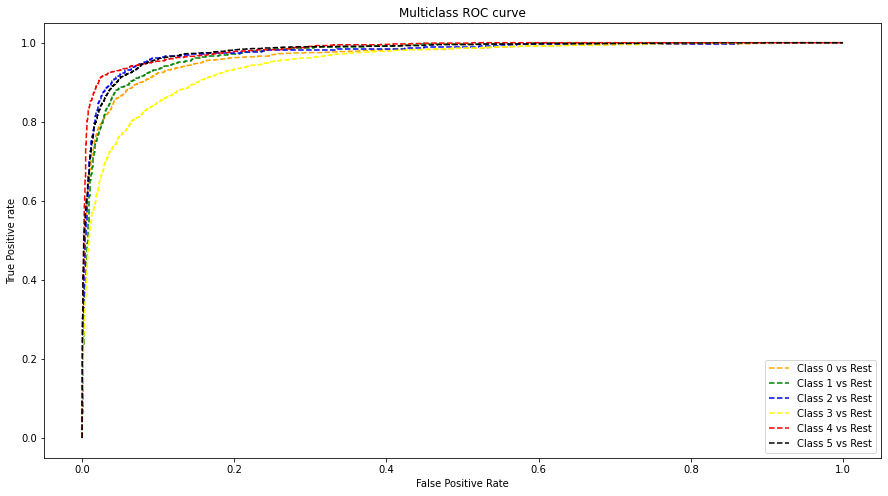

In [41]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_tfidf, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  


In [42]:
acc_table_tfidf = classification_report(y_test_tfidf, y_pred_tfidf)

# print the table
print(acc_table_tfidf)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1118
           1       0.81      0.85      0.83      1235
           2       0.76      0.86      0.81       713
           3       0.80      0.77      0.79      1950
           4       0.89      0.86      0.88       960
           5       0.89      0.87      0.88      2024

    accuracy                           0.83      8000
   macro avg       0.83      0.84      0.83      8000
weighted avg       0.83      0.83      0.83      8000



In [43]:
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso(alpha=0.1)

In [44]:
scores = cross_validate(lasso, X, y, cv=3,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
print(scores['test_neg_mean_squared_error'])

[-3.95113967 -2.75042467 -2.54961516]


In [45]:
print(scores['train_r2'])

[0. 0. 0.]


In [46]:
>>> cv_results = cross_validate(lasso, X, y, cv=3)
>>> sorted(cv_results.keys())
['fit_time', 'score_time', 'test_score']
>>> cv_results['test_score']


array([-0.01862823, -0.00206207, -0.01491744])

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(y_test_tfidf, y_pred_tfidf)
cm

array([[ 915,   35,   12,   60,   18,   78],
       [  11, 1047,   19,  134,    5,   19],
       [   6,   17,  613,   51,    2,   24],
       [  66,  151,  119, 1511,   36,   67],
       [  20,   25,   15,   52,  827,   21],
       [  97,   17,   30,   87,   42, 1751]])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression by using TF-IDF')

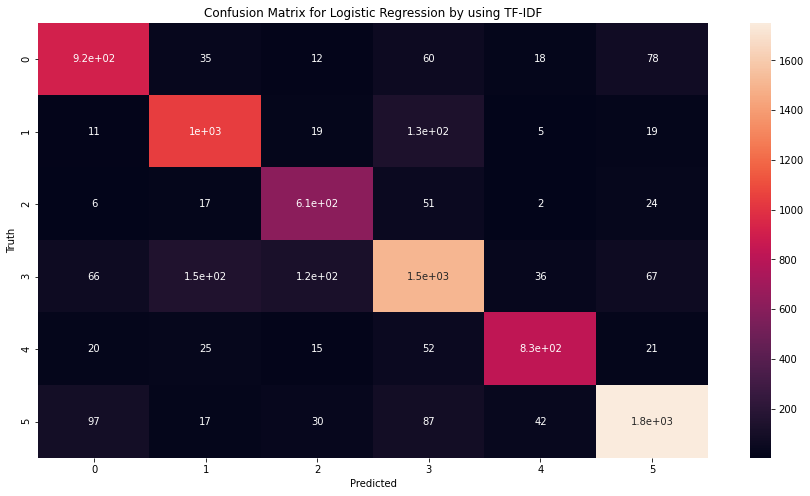

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Logistic Regression by using TF-IDF')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression by using TF-IDF')

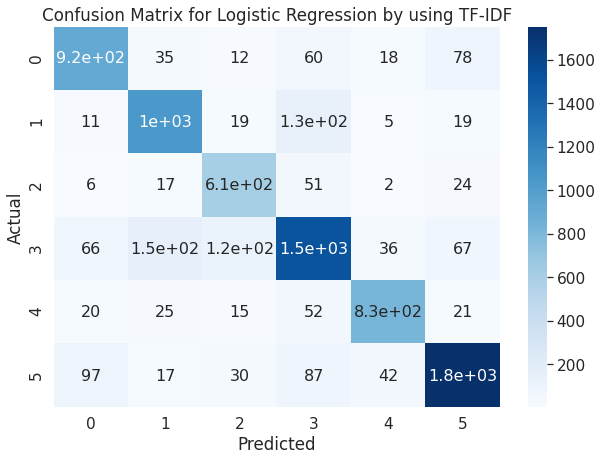

In [50]:
data = confusion_matrix(y_test_tfidf, y_pred_tfidf)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_tfidf), index = np.unique(y_test_tfidf))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Logistic Regression by using TF-IDF')

In [51]:
df['Cat1'].value_counts()

5    10266
3     9772
1     5846
0     5637
4     4862
2     3617
Name: Cat1, dtype: int64

In [52]:
#logreg = sm.Logit(y_train_tfidf, X_train_tfidf).fit()
#print(logreg.summary())

# inference: TF-IDF on Logistic Regression
  By using TF-IDF [technique for vectorization], we got **83.3% of F1 score**.
  so, TF-IDF works better,  it has clearly better linearity separable  classes    as shown in the increased F1 score. 

# CountVectorizer on Logistic Regression.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
vectorizer_c = CountVectorizer()
Count_cv = vectorizer_c.fit_transform(df['clean_text'])
print(vectorizer_c.get_feature_names())

['aaa', 'aaaa', 'aaaaaaaaaaaahhhhhhhhhh', 'aaaaaaaauuuuuuussssssoooooommmmmmmeeeeeee', 'aaaaaah', 'aaaaaand', 'aaaaaggghhhhh', 'aaaagggghhhhh', 'aaas', 'aack', 'aacute', 'aadams', 'aag', 'aagreat', 'aang', 'aare', 'aas', 'aasand', 'aayla', 'aback', 'abandon', 'abandonment', 'abate', 'abbies', 'abbreviate', 'abby', 'abc', 'abcs', 'abd', 'abdomen', 'abdominal', 'abdonminal', 'abe', 'abel', 'abenoe', 'abercrombie', 'aberration', 'aberrations', 'abhor', 'abialetti', 'abide', 'abigail', 'abilites', 'abilities', 'ability', 'abilties', 'abit', 'abject', 'able', 'ablilty', 'ably', 'abnormal', 'abnormalities', 'abnormally', 'aboard', 'abolutely', 'abominable', 'abomination', 'aboout', 'aborbent', 'abort', 'abortion', 'abortions', 'abosolutely', 'abosorb', 'abosultely', 'abosultley', 'abou', 'aboud', 'abound', 'abouti', 'aboutnot', 'abouve', 'abracadabra', 'abrams', 'abrasion', 'abrasions', 'abrasive', 'abrasiveness', 'abrasives', 'abreviated', 'abritax', 'abroad', 'abrooks', 'abrs', 'abrupt', '

In [55]:
# print(Count_vc.toarray())

In [56]:
Count_cv.shape

(40000, 38106)

In [57]:
X = Count_cv
y = df["Cat1"].values

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=0.2, random_state=2020)

In [58]:
model_logit_cv = LogisticRegression(class_weight="balanced",solver='saga', max_iter=100)
model_logit_cv.fit(X_train_cv, y_train_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred_cv = model_logit_cv.predict(X_test_cv)

f1score = f1_score(y_test_cv, y_pred_cv, average='micro')
print(f"Count vectorizer Model Score for Logistic Regression: {f1score * 100} %")

Count vectorizer Model Score for Logistic Regression: 81.925 %


In [60]:
# Count Vectorization Model training Score and testing score for Logistic Regression.

In [61]:
X_train_score_cv = model_logit_cv.score(X_train_cv, y_train_cv)
X_test_score_cv = model_logit_cv.score(X_test_cv, y_test_cv)

print(f"Count Vectorization Model training Score for Logistic Regression: {X_train_score_cv * 100} %")
print(f"Count Vectorization Model testing Score for Logistic Regression: {X_test_score_cv * 100} %")



Count Vectorization Model training Score for Logistic Regression: 89.221875 %
Count Vectorization Model testing Score for Logistic Regression: 81.925 %


In [62]:
recall_score_cv = recall_score(y_test_cv, model_logit_cv.predict(X_test_cv), average = 'macro')
print(f"Count vectorizer Model Recall Score for Logistic Regression: {recall_score_cv * 100} %")

Count vectorizer Model Recall Score for Logistic Regression: 82.3316957669828 %


In [63]:
precision_score_cv = precision_score(y_test_cv, model_logit_cv.predict(X_test_cv), average = 'macro')
print(f"Count vectorizer Model Recall Score for Logistic Regression: {precision_score_cv * 100} %")

Count vectorizer Model Recall Score for Logistic Regression: 81.11951687178602 %


In [64]:
acc_table_cv = classification_report(y_test_cv, y_pred_cv)

# print the table
print(acc_table_cv)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1118
           1       0.77      0.84      0.81      1235
           2       0.75      0.83      0.79       713
           3       0.80      0.75      0.77      1950
           4       0.85      0.85      0.85       960
           5       0.89      0.86      0.88      2024

    accuracy                           0.82      8000
   macro avg       0.81      0.82      0.82      8000
weighted avg       0.82      0.82      0.82      8000



In [65]:
## auc roc

In [66]:
y_pred_cv = model_logit_cv.predict(X_test_cv)
y_prob_pred_cv = model_logit_cv.predict_proba(X_test_cv)     

In [67]:
roc_auc_score(y_test_cv, y_prob_pred_cv, multi_class='ovo', average='weighted')

0.9662786239961907

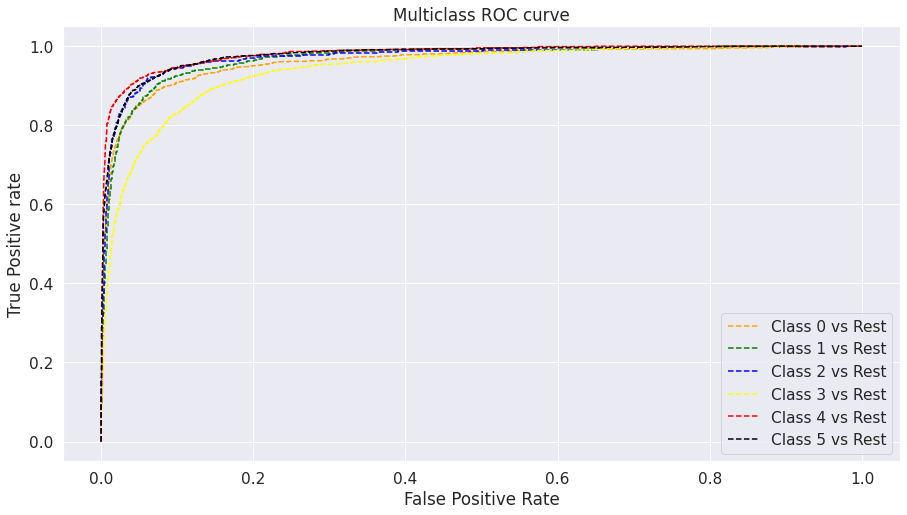

In [68]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_prob_pred_cv[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [69]:
cm_LR_cv = confusion_matrix(y_test_cv, y_pred_cv)
cm_LR_cv

array([[ 897,   35,   12,   63,   26,   85],
       [  19, 1043,   26,  116,   11,   20],
       [   7,   24,  593,   66,    2,   21],
       [  71,  191,  116, 1456,   53,   63],
       [  17,   31,   18,   49,  817,   28],
       [ 100,   28,   29,   68,   51, 1748]])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression by using Count Vectorizer')

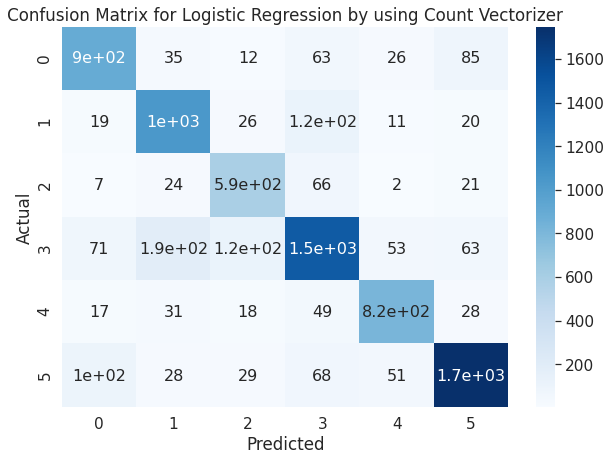

In [70]:
data = confusion_matrix(y_test_cv, y_pred_cv)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_cv), index = np.unique(y_test_cv))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Logistic Regression by using Count Vectorizer')

# # inference: Count Vectorizer on Logistic Regression
  By using Count Vectorizer [technique for vectorization], we got **81.925% of F1 score**.
  so, Count Vectorizer also works better,  it has clearly better linearity separable  classes   as shown in the increased F1 score. 

# Naive_Bayes

In [71]:
X = Count_cv
y = df["Cat1"].values

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=2020)

from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB()
model_naive.fit(X_train_nb, y_train_nb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
nr_correct_nb = (y_test_nb == model_naive.predict(X_test_nb)).sum()

In [73]:
print(f'{nr_correct_nb} documents classified correctly')

6618 documents classified correctly


In [74]:
nr_incorrect_nb = y_test_nb.size - nr_correct_nb

In [75]:
print(f'Number of documents incorrectly classified is {nr_incorrect_nb}')

Number of documents incorrectly classified is 1382


In [76]:
fraction_wrong_nb = nr_incorrect_nb / (nr_correct_nb + nr_incorrect_nb)

In [77]:
print(f'The (testing) accuracy of the model is  {1-fraction_wrong_nb:.2%}')

The (testing) accuracy of the model is  82.73%


In [78]:
#  training Score and testing score for Naive Bayes Model

In [79]:
X_train_score_nb = model_naive.score(X_train_nb, y_train_nb)
X_test_score_nb = model_naive.score(X_test_nb, y_test_nb)

print(f"Naive Bayes Model training Score : {X_train_score_nb * 100} %")
print(f"Naive Bayes Model testing Score : {X_test_score_nb * 100} %")



Naive Bayes Model training Score : 87.290625 %
Naive Bayes Model testing Score : 82.72500000000001 %


In [80]:
recall_score_naive = recall_score(y_test_nb, model_naive.predict(X_test_nb), average = 'macro')
print(f"Count vectorizer Model Recall Score for Naive Bayes: {recall_score_naive * 100} %")

Count vectorizer Model Recall Score for Naive Bayes: 82.36849737119836 %


In [81]:
precision_score_naive = precision_score(y_test_nb, model_naive.predict(X_test_nb), average = 'macro')
print(f"Count vectorizer Model precision_score for Naive Bayes: {precision_score_naive * 100} %")

Count vectorizer Model precision_score for Naive Bayes: 82.89266590902174 %


In [82]:
f1_score_naive = f1_score(y_test_nb, model_naive.predict(X_test_nb), average = 'macro')
print(f"Count vectorizer Model f1_score for Naive Bayes: {f1_score_naive * 100} %")

Count vectorizer Model f1_score for Naive Bayes: 82.58601131957055 %


In [83]:
model_naive.score(X_test_nb, y_test_nb)

0.82725

In [84]:
# Count_vc = vectorizer_c.transform(X_test)

In [85]:
X_test_nb[:10]

<10x38106 sparse matrix of type '<class 'numpy.int64'>'
	with 226 stored elements in Compressed Sparse Row format>

In [86]:
y_test_nb[:10]

array([3, 2, 3, 1, 3, 5, 5, 3, 1, 1])

In [87]:
model_naive.predict(X_test_nb[:10])

array([1, 2, 3, 1, 3, 5, 0, 3, 1, 1])

In [88]:
model_naive.predict_proba(X_test_nb[:10])

array([[2.58227065e-05, 9.98388394e-01, 7.35824864e-06, 1.57019547e-03,
        6.75443552e-06, 1.47472889e-06],
       [3.91600542e-09, 2.09127367e-07, 9.99979712e-01, 2.00400362e-05,
        3.41169536e-08, 5.64222236e-10],
       [2.79196230e-10, 1.06948017e-05, 3.71394530e-12, 9.99989305e-01,
        1.72523857e-10, 9.42350950e-11],
       [2.40978465e-07, 9.99907986e-01, 3.55513459e-06, 8.75858584e-05,
        5.63707554e-07, 6.85489652e-08],
       [1.22249571e-02, 1.19367445e-01, 3.55458261e-03, 7.23496494e-01,
        5.00112963e-02, 9.13452256e-02],
       [4.10405637e-05, 1.64919979e-12, 1.33249952e-16, 2.50543581e-06,
        9.55806807e-08, 9.99956358e-01],
       [6.39195149e-01, 2.95819320e-03, 1.50013855e-05, 8.49066732e-02,
        1.90085204e-02, 2.53916463e-01],
       [1.53873460e-04, 6.37419684e-06, 2.97957350e-14, 9.99820272e-01,
        7.15756878e-06, 1.23226117e-05],
       [1.68638848e-15, 9.99950699e-01, 5.68362751e-12, 4.93014149e-05,
        3.02127245e-13, 

In [89]:
y_pred_nb = model_naive.predict(X_test_nb)
y_pred_nb

array([1, 2, 3, ..., 2, 3, 2])

In [90]:
y_pred_nb = model_naive.predict(X_test_nb)
y_prob_pred_nb = model_naive.predict_proba(X_test_nb)

In [91]:
roc_auc_score(y_test_nb, y_prob_pred_nb, multi_class='ovo', average='weighted')

0.9649005481877614

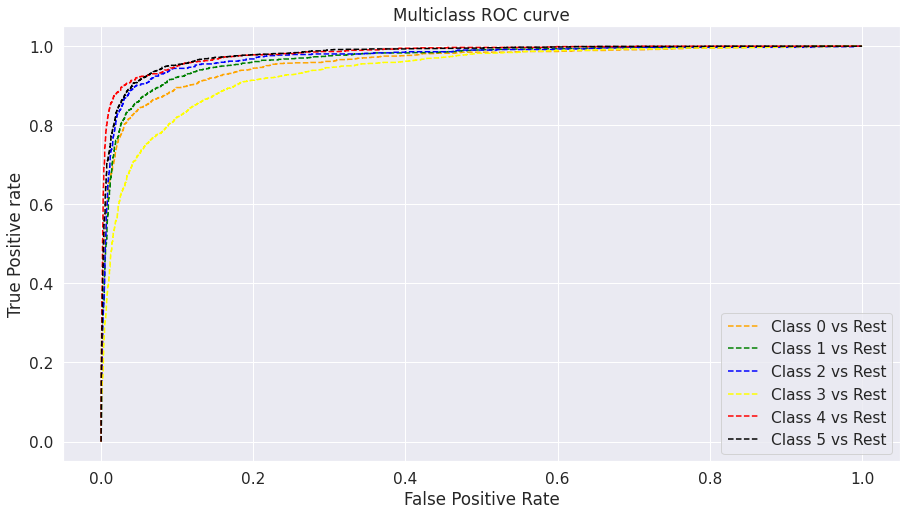

In [92]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_nb, y_prob_pred_nb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [93]:
cm_LR_nb = confusion_matrix(y_test_nb, y_pred_nb)
cm_LR_nb

array([[ 907,   19,    2,   50,   13,  127],
       [  26, 1005,    4,  167,    6,   27],
       [   5,   18,  572,   74,    6,   38],
       [ 114,  130,  118, 1477,   32,   79],
       [  33,   16,    6,   61,  812,   32],
       [  80,    6,   10,   58,   25, 1845]])

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

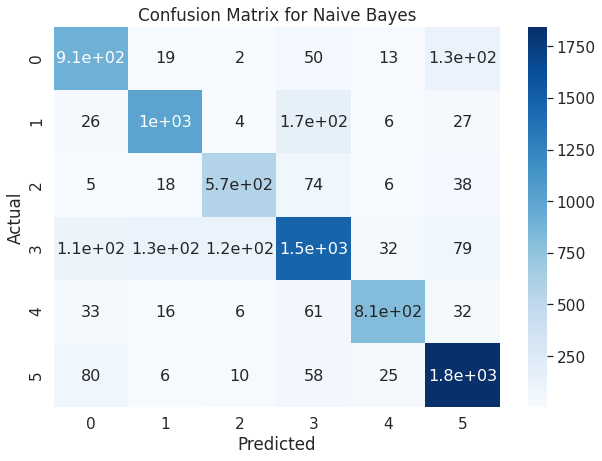

In [94]:
data = confusion_matrix(y_test_nb, y_pred_nb)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_nb), index = np.unique(y_test_nb))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Naive Bayes')

# Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model_tree = DecisionTreeClassifier()

In [97]:
X = Count_cv
y = df["Cat1"].values

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=2020)

In [98]:
model_tree.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
#  training Score and testing score for Decision Tree Model

In [100]:
X_train_score_dt = model_tree.score(X_train_dt, y_train_dt)
X_test_score_dt = model_tree.score(X_test_dt, y_test_dt)

print(f"Decision Tree Model training Score : {X_train_score_dt * 100} %")
print(f"Decision Tree Model testing Score : {X_test_score_dt * 100} %")


Decision Tree Model training Score : 99.8625 %
Decision Tree Model testing Score : 67.72500000000001 %


In [101]:
f1_score_DT = f1_score(y_test_dt, model_tree.predict(X_test_dt), average = 'macro')
print(f"Count vectorizer Model f1_score for Decision Tree: {f1_score_DT * 100} %")

Count vectorizer Model f1_score for Decision Tree: 67.4384446612171 %


In [102]:
recall_score_DT = recall_score(y_test_dt, model_tree.predict(X_test_dt), average = 'macro')
print(f"Count vectorizer Model recall_score for Decision Tree: {recall_score_DT * 100} %")

Count vectorizer Model recall_score for Decision Tree: 66.93638133586994 %


In [103]:
precision_score_DT = precision_score(y_test_dt, model_tree.predict(X_test_dt), average = 'macro')
print(f"Count vectorizer Model precision_score for Decision Tree: {precision_score_DT * 100} %")

Count vectorizer Model precision_score for Decision Tree: 68.03825412661317 %


In [104]:
y_pred_dt = model_tree.predict(X_test_dt)
y_prob_pred_dt = model_tree.predict_proba(X_test_dt)

In [105]:
roc_auc_score(y_test_dt, y_prob_pred_dt, multi_class='ovo', average='weighted')

0.8011344438634824

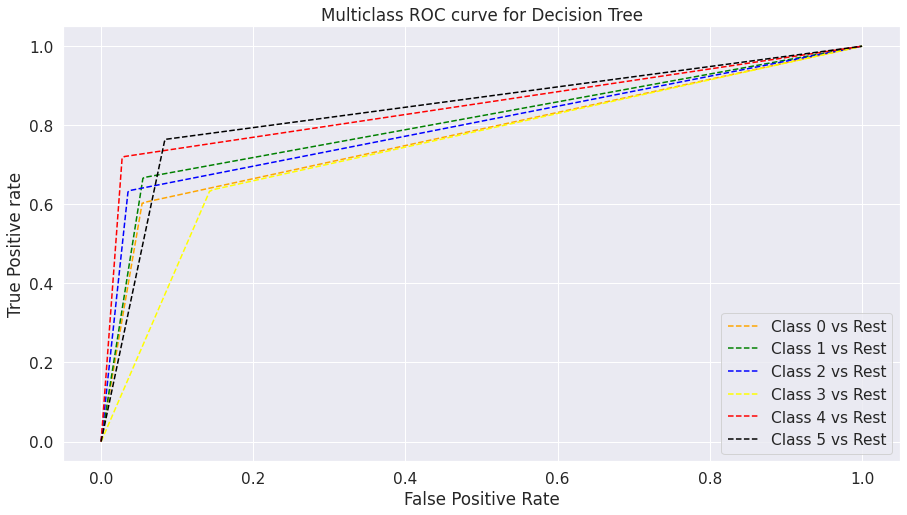

In [106]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_dt, y_prob_pred_dt[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)
cross_val_score(clf_dt, X, y, cv=10)

array([0.715  , 0.70525, 0.697  , 0.69   , 0.6955 , 0.66725, 0.67675,
       0.66025, 0.65775, 0.63675])

In [108]:
cm_LR_dt = confusion_matrix(y_test_dt, y_pred_dt)
cm_LR_dt

array([[ 674,   31,   16,  158,   28,  211],
       [  45,  826,   28,  264,   20,   52],
       [  23,   34,  450,  154,   14,   38],
       [ 111,  232,  153, 1236,   70,  148],
       [  36,   42,   25,  118,  688,   51],
       [ 159,   48,   35,  175,   63, 1544]])

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

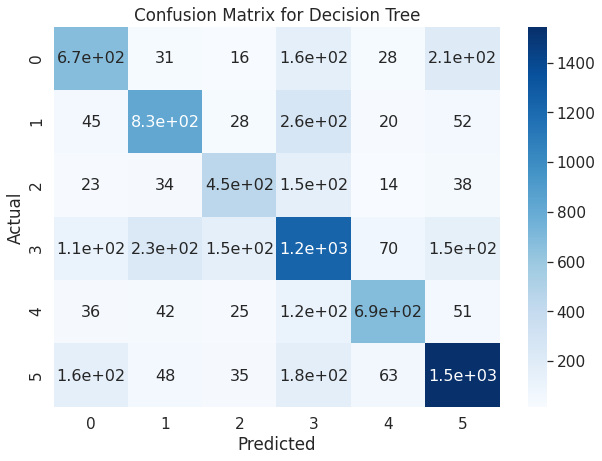

In [109]:
data = confusion_matrix(y_test_dt, y_pred_dt)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_dt), index = np.unique(y_test_dt))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Decision Tree')

# Random Forest Classifier- Count Vectorizer


In [110]:
X = Count_cv
y = df["Cat1"].values

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=2020)

In [111]:
X_test_rf.shape

(8000, 38106)

In [112]:
X_train_rf.shape

(32000, 38106)

In [113]:
y_train_rf.shape

(32000,)

In [114]:
y_test_rf.shape

(8000,)

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model_rf = RandomForestClassifier()
model_rf.fit(X_train_rf, y_train_rf)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
#  training Score and testing score for Random Forest Model

In [117]:
X_train_score_rf = model_rf.score(X_train_rf, y_train_rf)
X_test_score_rf = model_rf.score(X_test_rf, y_test_rf)

print(f"Random Forest Model training Score : {X_train_score_rf * 100} %")
print(f"Random Forest Model testing Score : {X_test_score_rf * 100} %")

#  training Score and testing score for Naive Bayes Model

Random Forest Model training Score : 99.8625 %
Random Forest Model testing Score : 78.925 %


In [118]:
y_pred_rf = model_rf.predict(X_test_rf)
y_pred_rf

array([1, 2, 3, ..., 3, 3, 2])

In [119]:
recall_score_RandomF = recall_score(y_test_rf, model_rf.predict(X_test_rf), average = 'macro')
print(f"Count vectorizer Model recall_score for Random Forest: {recall_score_RandomF * 100} %")

Count vectorizer Model recall_score for Random Forest: 76.75875024090492 %


In [120]:
precision_score_RandomF = precision_score(y_test_rf, model_rf.predict(X_test_rf), average = 'macro')
print(f"Count vectorizer Model precision_score for Random Forest: {precision_score_RandomF * 100} %")

Count vectorizer Model precision_score for Random Forest: 82.00397445914423 %


In [121]:
f1_score_RandomF = f1_score(y_test_rf, model_rf.predict(X_test_rf), average = 'macro')
print(f"Count vectorizer Model f1_score for Random Forest: {f1_score_RandomF * 100} %")

Count vectorizer Model f1_score for Random Forest: 78.79409177740578 %


In [122]:
y_test_rf[:10]

array([3, 2, 3, 1, 3, 5, 5, 3, 1, 1])

In [123]:
y_predict_rf = model_rf.predict(X_test_rf[:10])
y_predict_rf

array([1, 2, 3, 3, 3, 5, 5, 3, 1, 1])

In [124]:
y_pred_rf = model_rf.predict(X_test_rf)
y_prob_pred_rf = model_rf.predict_proba(X_test_rf)

In [125]:
roc_auc_score(y_test_rf, y_prob_pred_rf, multi_class='ovo', average='weighted')

0.9525235947536151

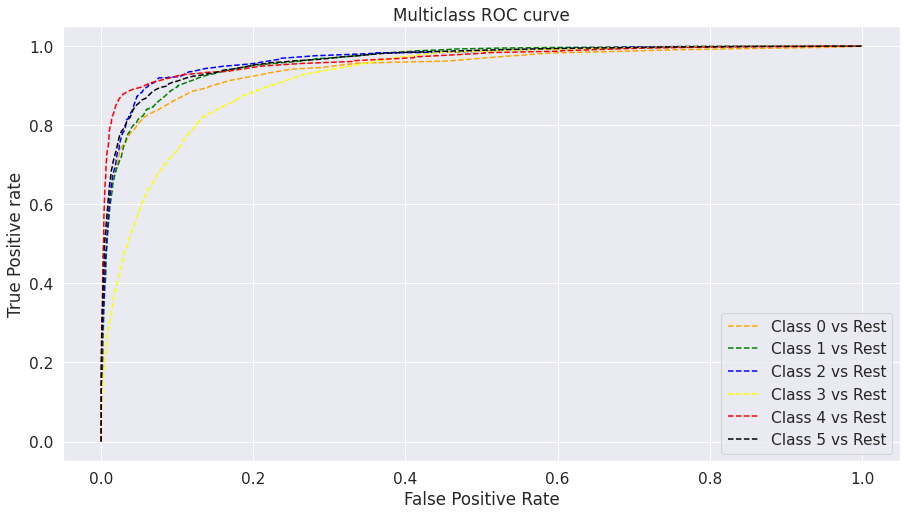

In [126]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_rf, y_prob_pred_rf[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [127]:
cm_LR_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_LR_rf

array([[ 749,   21,    3,  122,   11,  212],
       [  15,  934,    2,  243,    3,   38],
       [   5,   15,  507,  123,    7,   56],
       [  42,  148,   82, 1562,   18,   98],
       [  18,   23,   10,  113,  733,   63],
       [  28,    8,    7,  133,   19, 1829]])

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

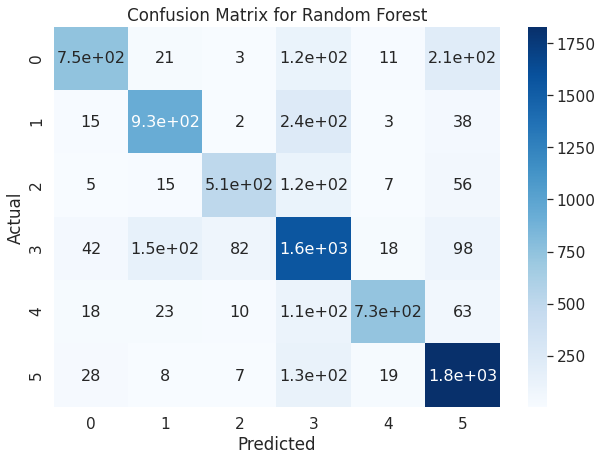

In [128]:
data = confusion_matrix(y_test_rf, y_pred_rf)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_rf), index = np.unique(y_test_rf))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Random Forest')

# Support vector Machine classifier

In [129]:
from sklearn.svm import SVC

In [130]:
X = Vec
y = df["Cat1"].values

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=2020)

In [131]:
model_svm = SVC()
model_svm.fit(X_train_svm, y_train_svm)
model_svm.score(X_test_svm, y_test_svm)

0.83425

In [132]:
#  training Score and testing score for Support vector Machine classifier Model

In [133]:
X_train_score_svm = model_svm.score(X_train_svm, y_train_svm)
X_test_score_svm = model_svm.score(X_test_svm, y_test_svm)

print(f"Support vector Machine classifier Model training Score : {X_train_score_svm * 100} %")
print(f"Support vector Machine classifier Model testing Score : {X_test_score_svm * 100} %")


Support vector Machine classifier Model training Score : 97.340625 %
Support vector Machine classifier Model testing Score : 83.42500000000001 %


In [134]:
f1_score_svc = f1_score(y_test_svm, model_svm.predict(X_test_svm), average = 'macro')
print(f"Count vectorizer Model f1_score for support vector classifier: {f1_score_svc * 100} %")

Count vectorizer Model f1_score for support vector classifier: 83.61661046690445 %


In [135]:
recall_score_svc = recall_score(y_test_svm, model_svm.predict(X_test_svm), average = 'macro')
print(f"Count vectorizer Model recall_score for support vector classifier: {recall_score_svc * 100} %")

Count vectorizer Model recall_score for support vector classifier: 81.88070159618196 %


In [136]:
precision_score_svc = precision_score(y_test_svm, model_svm.predict(X_test_svm), average = 'macro')
print(f"Count vectorizer Model precision_score for support vector classifier: {precision_score_svc * 100} %")

Count vectorizer Model precision_score for support vector classifier: 86.06510195569682 %


In [137]:
#y_pred_svm = model_svm.predict(X_test_svm)
#y_prob_pred_cnb_svm = model_svm.predict_proba(X_test_svm,probability=True)     


In [138]:
roc_auc_score(y_test_svm, y_prob_pred_cnb_svm, multi_class='ovo', average='weighted')

NameError: ignored

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_svm, y_prob_pred_cnb_svm[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [ ]:
cm_LR_svm = confusion_matrix(y_test_svm, y_pred_svm)
cm_LR_svm

In [ ]:
data = confusion_matrix(y_test_svm, y_pred_svm)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_svm), index = np.unique(y_test_svm))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Support vector classification')

# KNN

In [139]:
X = Count_cv
y = df["Cat1"].values

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=10)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [141]:
knn_classifier = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')

In [142]:
knn_classifier.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [143]:
#  training Score and testing score for Support vector Machine classifier Model

In [144]:
X_train_score_knn = knn_classifier.score(X_train_knn, y_train_knn)
X_test_score_knn = knn_classifier.score(X_test_knn, y_test_knn)

print(f"KNeighbors Classifier Model training Score : {X_train_score_knn * 100} %")
print(f"KNeighbors Classifier Model testing Score : {X_test_score_knn * 100} %")


KNeighbors Classifier Model training Score : 66.21249999999999 %
KNeighbors Classifier Model testing Score : 50.0 %


In [145]:
pred_test_knn = knn_classifier.predict(X_test_knn)
pred_test_knn

array([5, 5, 2, ..., 3, 2, 3])

In [146]:
class_report_knn = (classification_report(y_test_knn, pred_test_knn))
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.58      0.42      0.48      1139
           1       0.39      0.59      0.47      1145
           2       0.25      0.51      0.34       702
           3       0.46      0.47      0.47      1953
           4       0.81      0.39      0.52      1013
           5       0.77      0.58      0.66      2048

    accuracy                           0.50      8000
   macro avg       0.54      0.49      0.49      8000
weighted avg       0.57      0.50      0.51      8000



In [147]:
f1_score_knn = f1_score(y_test_knn, knn_classifier.predict(X_test_knn), average = 'macro')
print(f"Count vectorizer Model f1_score for KNN classifier: {f1_score_knn * 100} %")

Count vectorizer Model f1_score for KNN classifier: 48.9617063590923 %


In [148]:
recall_score_knn = recall_score(y_test_knn, knn_classifier.predict(X_test_knn), average = 'macro')
print(f"Count vectorizer Model recall_score for support vector classifier: {recall_score_knn * 100} %")

Count vectorizer Model recall_score for support vector classifier: 49.19063852707844 %


In [149]:
precision_score_knn = precision_score(y_test_knn, knn_classifier.predict(X_test_knn), average = 'macro')
print(f"Count vectorizer Model precision_score for support vector classifier: {precision_score_knn * 100} %")

Count vectorizer Model precision_score for support vector classifier: 54.25763039551214 %


In [150]:
y_pred_knn = knn_classifier.predict(X_test_knn)
y_prob_pred_cnb_knn = knn_classifier.predict_proba(X_test_knn)    

In [151]:
roc_auc_score(y_test_knn, y_prob_pred_cnb_knn, multi_class='ovo', average='weighted')

0.78282914533131

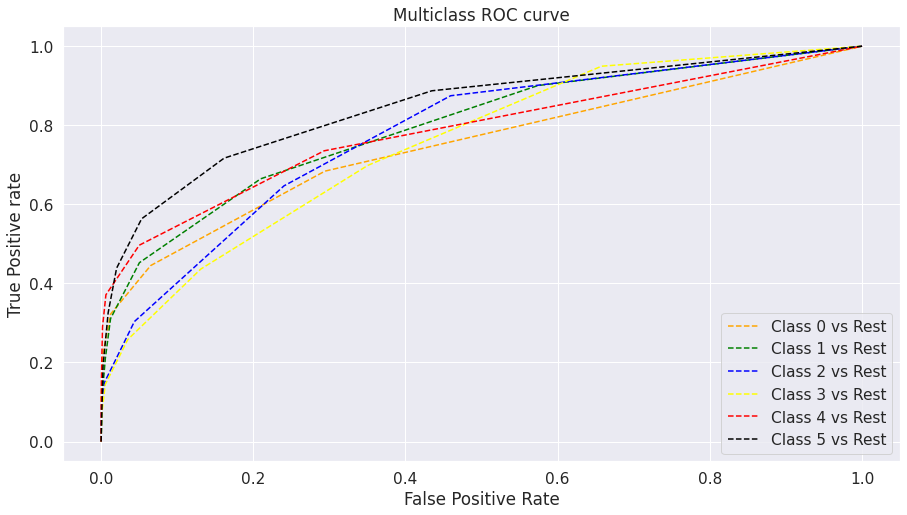

In [152]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_knn, y_prob_pred_cnb_knn[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [153]:
cm_LR_knn = confusion_matrix(y_test_knn, y_pred_knn)
cm_LR_knn

array([[ 473,  136,  158,  209,   26,  137],
       [  58,  675,  152,  214,    7,   39],
       [  22,  121,  359,  159,    7,   34],
       [ 129,  425,  361,  922,   22,   94],
       [  61,  147,  141,  215,  393,   56],
       [  75,  229,  258,  277,   31, 1178]])

Text(0.5, 1.0, 'Confusion Matrix for Support vector classification')

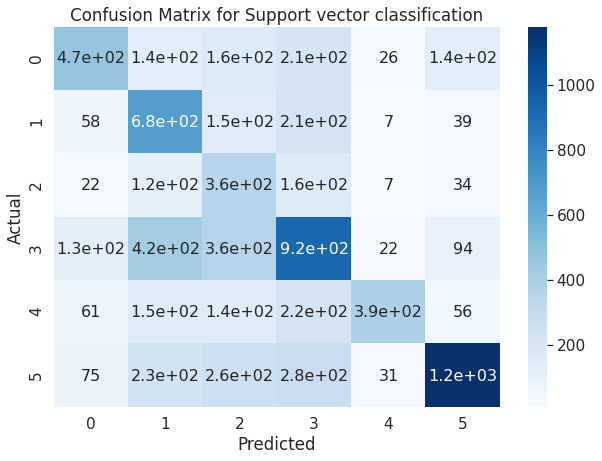

In [154]:
data = confusion_matrix(y_test_knn, y_pred_knn)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_knn), index = np.unique(y_test_knn))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Support vector classification')

# K-Fold cross validation

In [155]:
from sklearn.model_selection import KFold

In [156]:
kfold = KFold(n_splits = 6)
kfold

KFold(n_splits=6, random_state=None, shuffle=False)

In [157]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [158]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 6)

In [159]:
score_logit = []  # f1 score 
score_Naive = []
score_randomForest = []
score_DT = []
score_knn = []

#scoring = {'f1_score' : make_scorer(f1_score)}

for train_index, test_index in kfold.split(X):
  X_train, X_test, y_train, y_test = X[train_index], X[test_index],  y[train_index], y[test_index]

  score_logit.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test))
  score_Naive.append(get_score(MultinomialNB(),X_train, X_test, y_train, y_test))
  score_randomForest.append(get_score(RandomForestClassifier(),X_train, X_test, y_train, y_test)) 
  score_DT.append(get_score(DecisionTreeClassifier(),X_train, X_test, y_train, y_test))
  score_knn.append(get_score(KNeighborsClassifier(),X_train, X_test, y_train, y_test))  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [160]:
score_logit  
# max = 85.18 and min = 79.19  so varience between these two scores is 5.99

[0.8518074096295185,
 0.8315584220788961,
 0.815209239538023,
 0.8041097945102745,
 0.8063306330633063,
 0.791929192919292]

In [161]:
score_Naive 
# max = 87.37 and min = 79.56  so varience between these two scores is 7.81

[0.8737063146842657,
 0.8383080845957702,
 0.8290085495725213,
 0.8180590970451478,
 0.8153315331533153,
 0.7956795679567957]

In [162]:
score_randomForest 
# max = 81.98 and min = 73.85  so varience between these two scores is 8.13

[0.8198590070496475,
 0.7991600419979001,
 0.783410829458527,
 0.7724613769311535,
 0.7617761776177617,
 0.7385238523852385]

In [163]:
score_DT 
# max = 70.13 and min = 63.80  so varience between these two scores is 6.33

[0.7013649317534123,
 0.6836658167091645,
 0.6743662816859157,
 0.6518674066296685,
 0.6543654365436543,
 0.638013801380138]

In [164]:
score_knn 
# max = 52.39 and min = 46.02  so varience between these two scores is 6.37

[0.5239238038098095,
 0.5002249887505624,
 0.46107694615269235,
 0.463626818659067,
 0.4602460246024602,
 0.46234623462346236]

In [ ]:
score_logit

In [ ]:
score_logit_avg = statistics.mean(score_logit)
print('Avg score of Logistic Regression after K-Fold:>>>>>',score_logit_avg)

In [ ]:
score_Naive 

In [ ]:
score_Naive_avg = statistics.mean(score_Naive)
print('Avg score of Naive bayes after K-Fold:>>>>>',score_Naive_avg)

In [ ]:
score_randomForest 

In [ ]:
score_randomForest_avg = statistics.mean(score_randomForest)
print('Avg score of Random Forest after K-Fold:>>>>>',score_randomForest_avg)

In [ ]:
score_knn

In [ ]:
print('Avg score of KNN after K-Fold:>>>>>',0.47)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn import model_selection

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', MultinomialNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'precision_macro'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Scores Table

In [165]:
df_score = pd.DataFrame({'Models':['Logistic Regression TF-IDF','Logistic Regression Count_Vectorizer','Naive Bayes Count_Vectorizer','Random Forest Count_Vectorizer','Decision Tree Count_Vectorizer','KNN Count_Vectorizer'],
                         'F1_Score':['83.03','81.95','82.56','78.74','67.31','48.96'],
                         'Recall_score':['83.78','83.37','82.32','76.61','67.03','49.19'],
                         'precision_score':['82.82','81.17','82.89','82.15','67.65','54.25'],
                         'roc_auc_score':['97.11','96.62','96.49','95.28','79.99','78.28'],
                         'K-Fold score':['81.68','81.68','82.83','77.68','NaN','47.82'],
                         'Training_Score':['90.40','89.25','87.29','99.86','99.86','66.21'],
                         'Testing_Score':['83.2','81.98','82.72','79.02','67.4','50.0']})

In [171]:
df_score

,Models,F1_Score,Recall_score,precision_score,roc_auc_score,K-Fold score,Training_Score,Testing_Score
0,Logistic Regression TF-IDF,83.03,83.78,82.82,97.11,81.68,90.40,83.2
1,Logistic Regression Count_Vectorizer,81.95,83.37,81.17,96.62,81.68,89.25,81.98
2,Naive Bayes Count_Vectorizer,82.56,82.32,82.89,96.49,82.83,87.29,82.72
3,Random Forest Count_Vectorizer,78.74,76.61,82.15,95.28,77.68,99.86,79.02
4,Decision Tree Count_Vectorizer,67.31,67.03,67.65,79.99,NaN,99.86,67.4
5,KNN Count_Vectorizer,48.96,49.19,54.25,78.28,47.82,66.21,50.0
